In [1]:
#DATA ANALYSIS OF Cars Dataset From 4 Locations of 4 Car Companies

#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#LOAD THE DATA

# Assuming you have the scraped data saved as 'cars_data.csv'
df = pd.read_csv('/content/drive/MyDrive/Cars_data.csv')

# Display the first few rows to inspect the data
print(df.head())


   Unnamed: 0    Brand  Manufacturing Year  \
0           0  Hyundai                2017   
1           1  Hyundai                2017   
2           2  Hyundai                2019   
3           3  Hyundai                2019   
4           4  Hyundai                2021   

                                  Model  Kilometers Driven Fuel Type  \
0           Creta SX PLUS AT 1.6 PETROL              98493    Petrol   
1                      Eon ERA PLUS (O)              33963    Petrol   
2                   Creta SX 1.6 DIESEL              43987    Diesel   
3                      NEW SANTRO MAGNA              33609    Petrol   
4  NEW I20 ASTA 1.0 TURBO IMT DUAL TONE              26797    Petrol   

  Transmission Type    Price   Location  
0         Automatic   953000  Bangalore  
1            Manual   381000  Bangalore  
2            Manual  1152000  Bangalore  
3            Manual   429000  Bangalore  
4            Manual  1021000  Bangalore  


In [19]:
#BASIC DATA CLEANING

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.dropna()  # Alternatively, you can fill missing values with df.fillna(value)

# Convert price to numeric (assuming it's a string with currency symbols)
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert other columns if necessary (e.g., Year)
df['Manufacturing Year'] = df['Manufacturing Year'].astype(int)
df['Kilometers Driven'] = df['Kilometers Driven'].astype(int)

# Check the data types after conversion
print(df.dtypes)


Unnamed: 0            0
Brand                 0
Manufacturing Year    0
Model                 0
Kilometers Driven     0
Fuel Type             0
Transmission Type     0
Price                 0
Location              0
dtype: int64
Unnamed: 0              int64
Brand                  object
Manufacturing Year      int64
Model                  object
Kilometers Driven       int64
Fuel Type              object
Transmission Type      object
Price                 float64
Location               object
dtype: object


In [20]:
# DESCRIPTIVE STATISTICS

# Summary statistics for numerical columns
print(df.describe())

# Count of unique values in categorical columns
print(df['Brand'].value_counts())
print(df['Model'].value_counts())


        Unnamed: 0  Manufacturing Year  Kilometers Driven         Price
count  2373.000000         2373.000000        2373.000000  2.373000e+03
mean   1186.000000         2017.651075       50317.729878  5.963456e+05
std     685.170417            3.082008       26968.343988  2.766613e+05
min       0.000000         2010.000000         476.000000  1.070000e+05
25%     593.000000         2016.000000       29239.000000  4.110000e+05
50%    1186.000000         2018.000000       47500.000000  5.380000e+05
75%    1779.000000         2020.000000       69271.000000  7.190000e+05
max    2372.000000         2024.000000      130587.000000  2.702000e+06
Brand
Maruti     1164
Hyundai     876
Tata        271
Toyota       62
Name: count, dtype: int64
Model
Swift VXI                          68
Baleno DELTA PETROL 1.2            58
Baleno ZETA PETROL 1.2             56
Wagon R 1.0 VXI                    55
Grand i10 SPORTZ 1.2 KAPPA VTVT    49
                                   ..
VENUE SX (O) 1.5 CRDI 

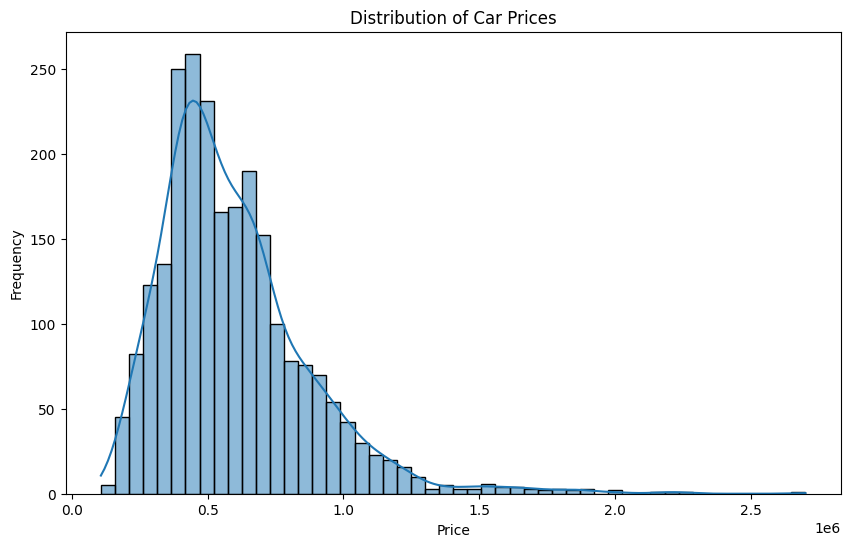

In [21]:
# DATA VISUALIZATION

# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


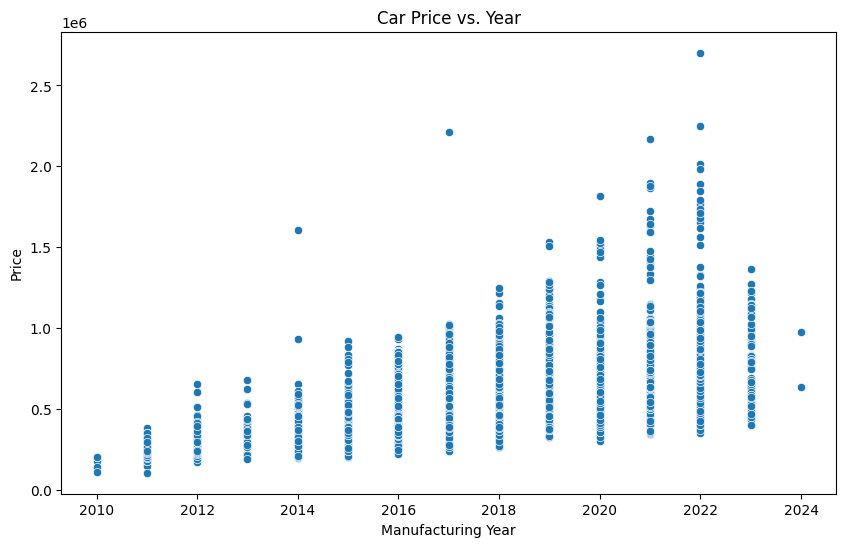

In [11]:
# Price Vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Manufacturing Year', y='Price', data=df)
plt.title('Car Price vs. Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.show()


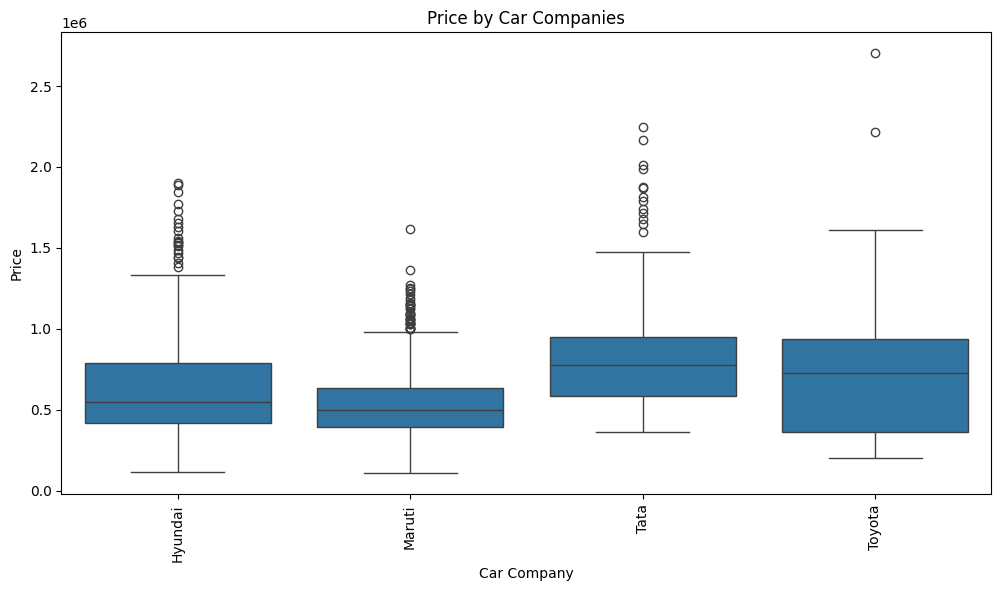

In [22]:
# Price by Companies
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Price by Car Companies')
plt.xlabel('Car Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


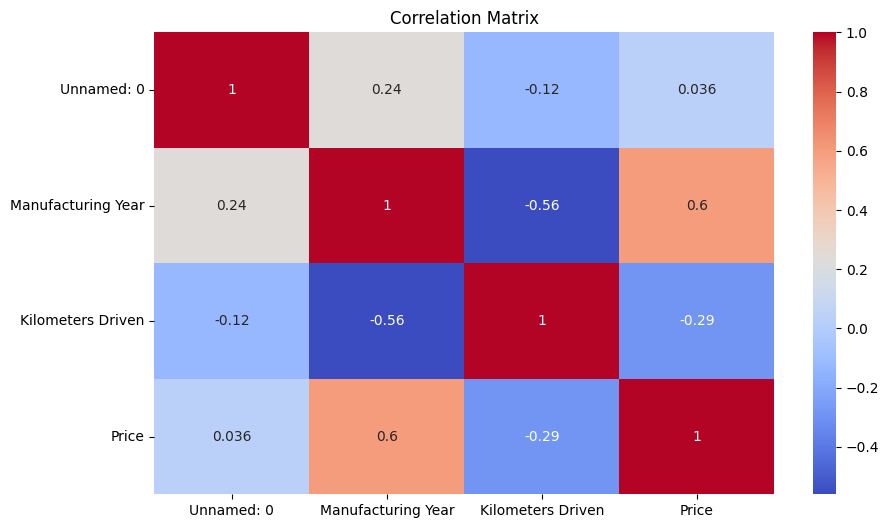

In [15]:
# CORRELATION ANALYSIS

# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# JUST A SIMPLE REGRESSION MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Features and target variable
X = df[['Manufacturing Year', 'Location']]
y = df['Price']

# Encode the 'Location' column
label_encoder = LabelEncoder() # Initialize LabelEncoder
X['Location'] = label_encoder.fit_transform(X['Location']) # Transform location strings to numerical labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 41161813070.47901


<ipython-input-17-51ab8830aa66>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = label_encoder.fit_transform(X['Location']) # Transform location strings to numerical labels
